1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    3. a. Use elbow method as baseline
    3. b. Apply other methods to compare with elbow
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable clustering model for this problem.
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

| Biến                        | Mô tả                                                                 |
|-----------------------------|----------------------------------------------------------------------|
| `BALANCE`                   | Số dư còn lại trong tài khoản để thực hiện mua sắm                  |
| `BALANCE_FREQUENCY`         | Tần suất cập nhật số dư, giá trị từ 0 đến 1 (1 = cập nhật thường xuyên) |
| `PURCHASES`                 | Tổng số tiền đã mua sắm từ tài khoản                                |
| `ONEOFF_PURCHASES`          | Giá trị lớn nhất của một lần mua hàng đơn lẻ                        |
| `INSTALLMENTS_PURCHASES`    | Tổng giá trị mua hàng theo hình thức trả góp                        |
| `CASH_ADVANCE`              | Số tiền mặt được ứng trước bởi người dùng                           |
| `PURCHASES_FREQUENCY`       | Tần suất thực hiện các giao dịch mua sắm (0 đến 1)                  |
| `ONEOFF_PURCHASES_FREQUENCY`| Tần suất thực hiện các giao dịch mua đơn lẻ (0 đến 1)               |
| `PURCHASES_INSTALLMENTS_FREQUENCY` | Tần suất mua hàng trả góp (0 đến 1)                          |
| `CASH_ADVANCE_FREQUENCY`    | Tần suất ứng trước tiền mặt (0 đến 1)                               |
| `CASH_ADVANCE_TRX`          | Số lượng giao dịch ứng trước tiền mặt                               |
| `PURCHASES_TRX`             | Số lượng giao dịch mua hàng                                         |
| `CREDIT_LIMIT`              | Hạn mức tín dụng của thẻ đối với người dùng                         |
| `PAYMENTS`                  | Tổng số tiền người dùng đã thanh toán                               |
| `MINIMUM_PAYMENTS`          | Khoản thanh toán tối thiểu người dùng đã trả                        |
| `PRC_FULL_PAYMENT`          | Tỷ lệ phần trăm thanh toán toàn bộ nợ                              |
| `TENURE`                    | Thời gian sử dụng thẻ tín dụng của người dùng                       |


**Chỉ dùng các features trên để phân cụm**

# Load Dataset

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Clustered_Customer_Data.csv")

In [4]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [5]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Data Analysis

In [6]:
# Kiểm tra thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
# Kiểm tra dữ liệu khuyết
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Cluster                             0
dtype: int64

In [8]:
# Kiểm tra dữ liệu trùng lặp
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe().round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00
mean,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52,1.44
std,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.61,2895.06,2330.59,0.29,1.34,1.37
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00,0.00
25%,128.28,0.89,39.64,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.28,170.86,0.00,12.00,0.00
50%,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,335.63,0.00,12.00,2.00
75%,2054.14,1.00,1110.13,577.40,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.13,864.21,0.14,12.00,3.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00,3.00


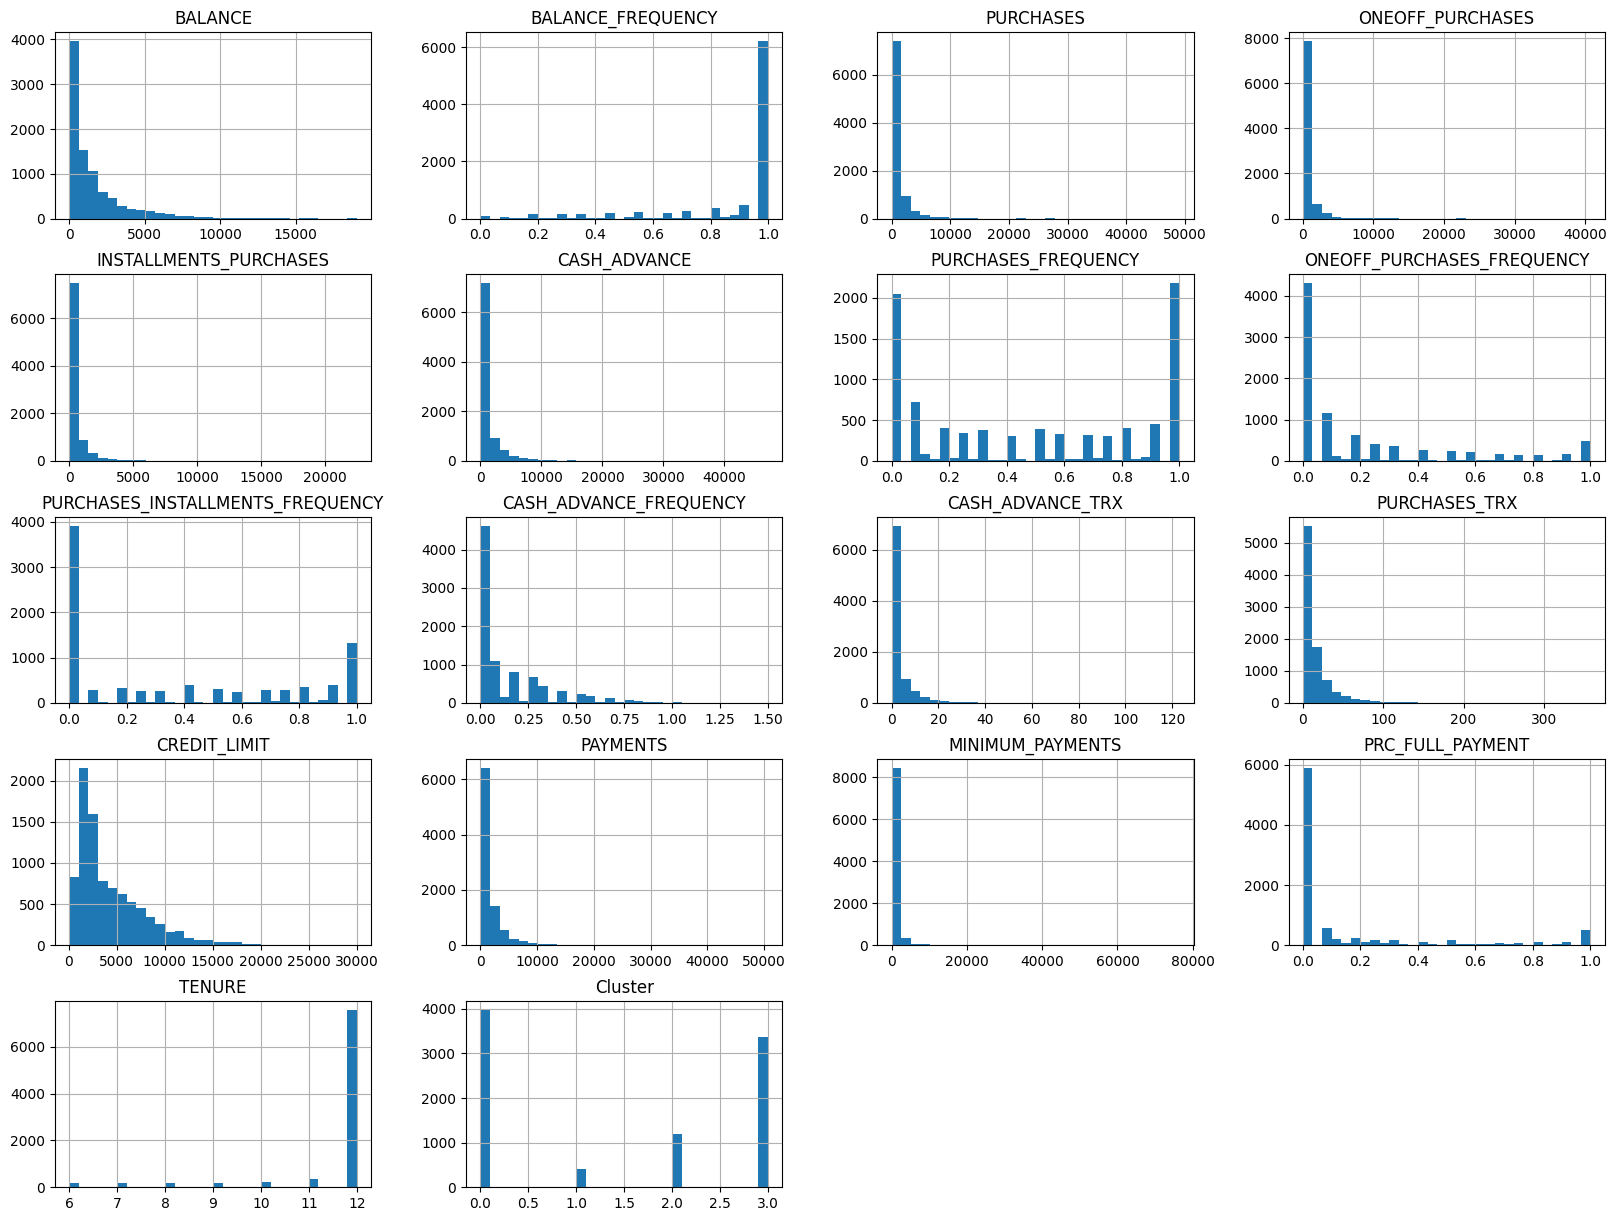

In [12]:
df.hist(figsize=(20, 15), bins=30)
plt.show()

In [13]:
cluster_summary = df.groupby('Cluster')[[
    'BALANCE',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY'
]].mean().round(2)

cluster_summary

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY
Cluster,,,,,,,,
0,1011.75,269.97,209.85,60.39,595.76,0.17,0.09,0.11
1,3551.15,7681.62,5095.88,2587.21,653.64,0.95,0.74,0.07
2,4602.46,501.90,320.37,181.61,4520.72,0.29,0.14,0.48
3,894.91,1236.18,593.97,642.48,210.57,0.89,0.30,0.04


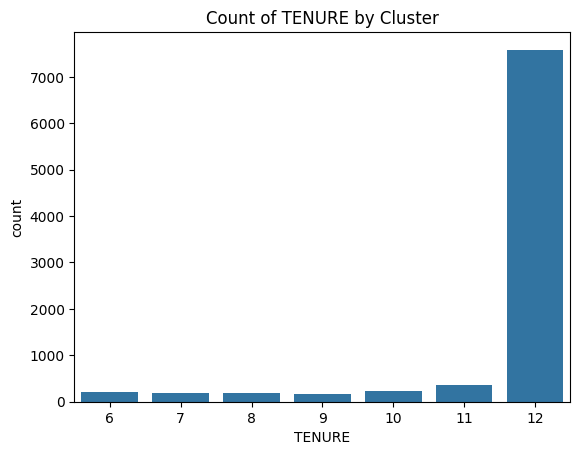

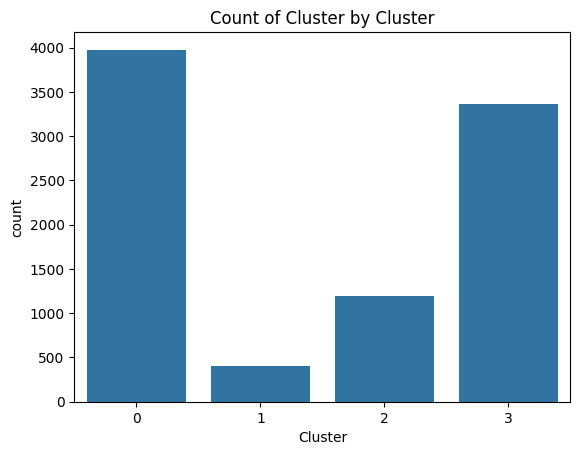

In [18]:
for col in ['TENURE', 'Cluster']:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col} by Cluster')
    plt.show()

# Data Preprocessing

In [ ]:
# Replace outlier with median each cluster
def handle_outliers(df, feature):
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        median_value = cluster_data[feature].median()
        std_value = cluster_data[feature].std()
        threshold = 3 * std_value
        outliers = (cluster_data[feature] < (mean_value - threshold)) | (cluster_data[feature] > (mean_value + threshold))
        df.loc[(df['Cluster'] == cluster) & outliers, feature] = median_value
    return df

In [96]:
cleaned_df = df.copy()
for col in numerical_cols:
    cleaned_df = handle_outliers(cleaned_df, col)
# Kiểm tra lại dữ liệu sau khi loại bỏ outliers
print("Data shape after removing outliers:", cleaned_df.shape)

Data shape after removing outliers: (8950, 18)


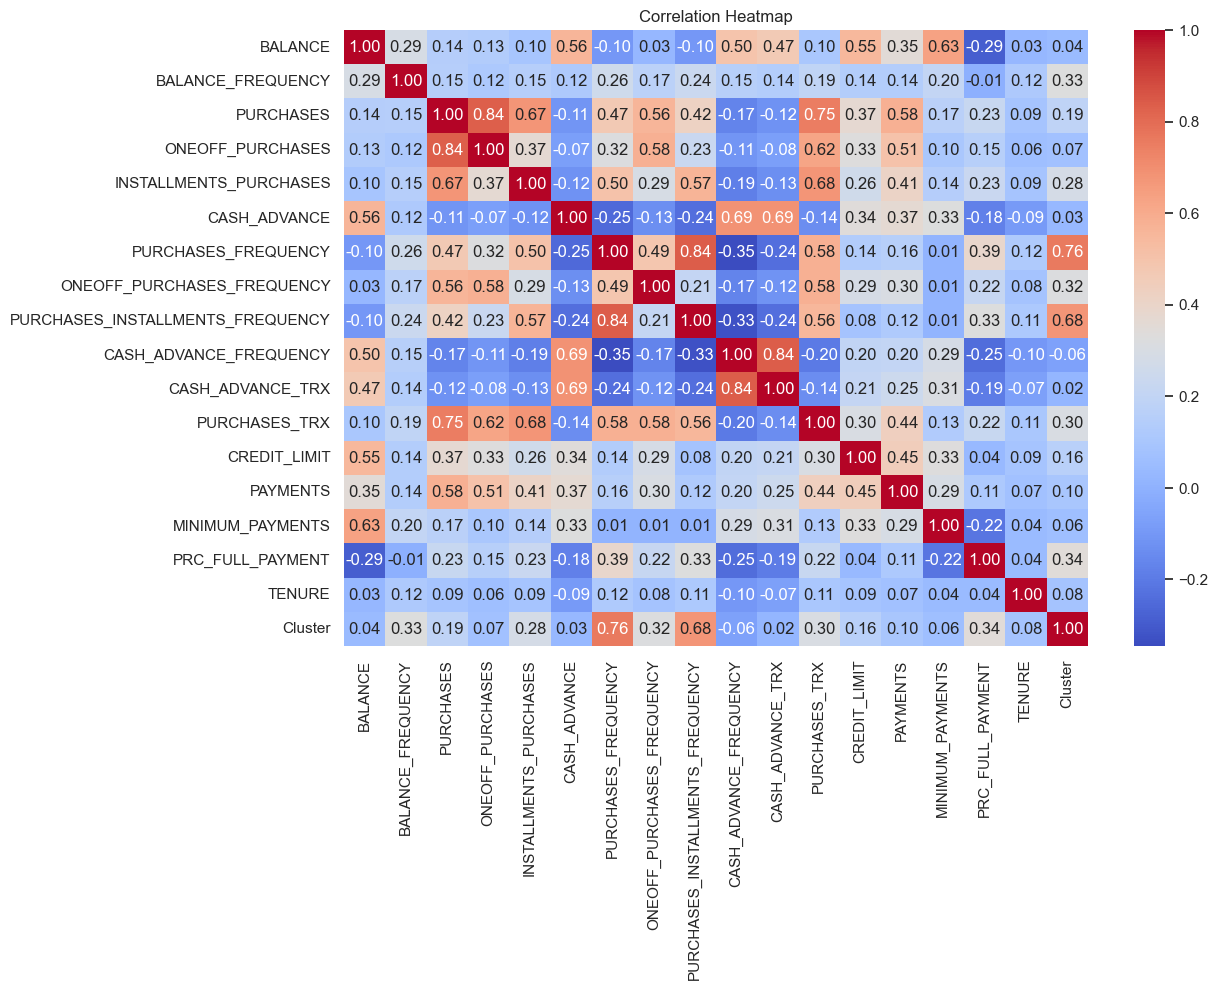

In [99]:
# Plot heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

# Model Part

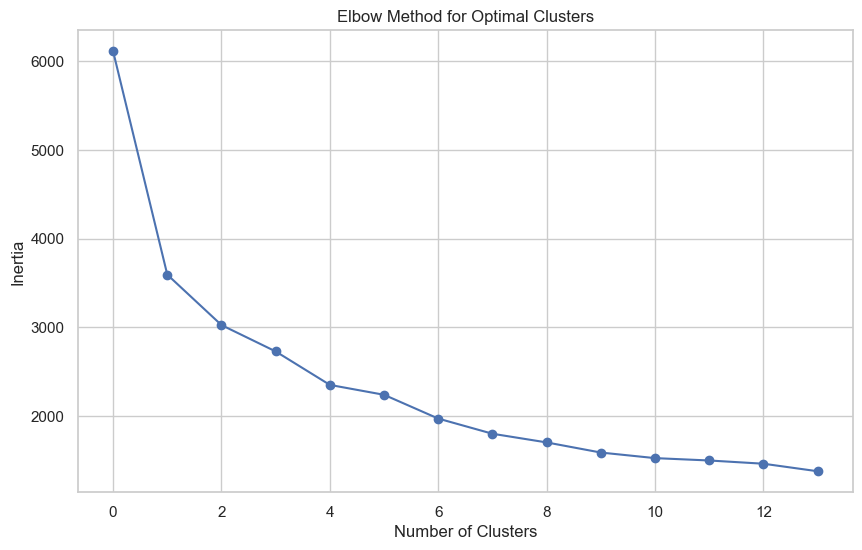

In [63]:
# Using elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks()
plt.grid(range(1, 15))
plt.show()

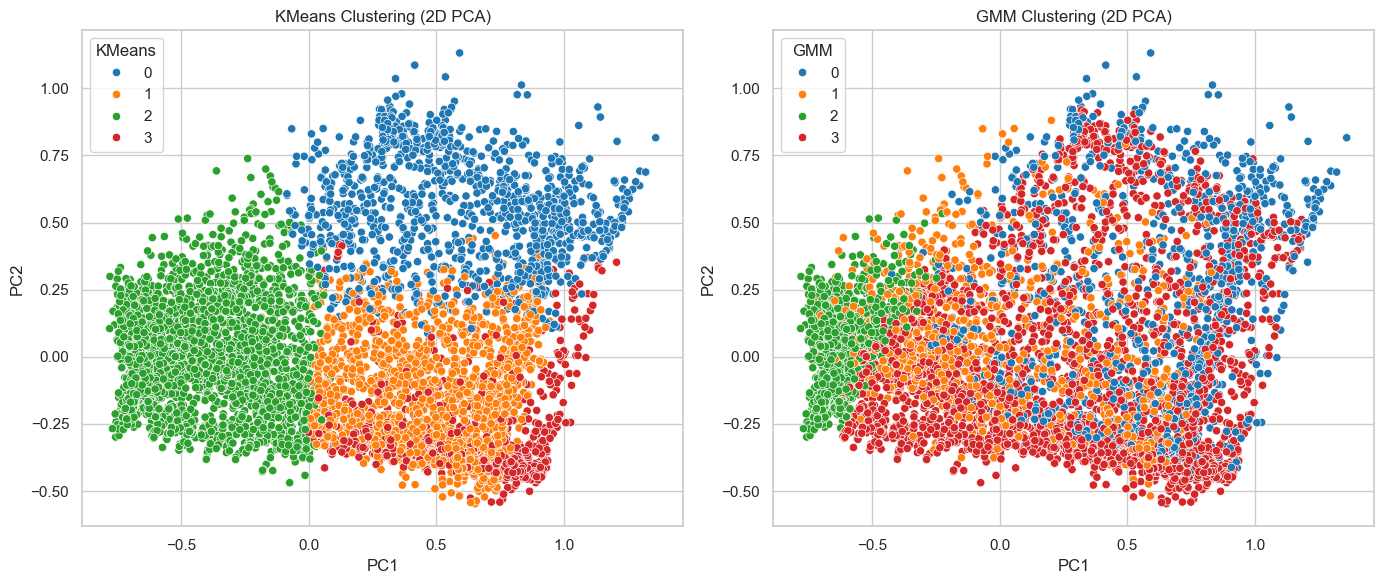

In [64]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# GMM clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2, random_state=42)
scaled_data_2d = pca.fit_transform(scaled_data)

# Tạo DataFrame để trực quan hóa
plot_df = pd.DataFrame(scaled_data_2d, columns=["PC1", "PC2"])
plot_df["KMeans"] = kmeans_labels
plot_df["GMM"] = gmm_labels

# Vẽ biểu đồ 2D cho KMeans và GMM
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=plot_df, x="PC1", y="PC2", hue="KMeans", palette="tab10", ax=axes[0])
axes[0].set_title("KMeans Clustering (2D PCA)")

sns.scatterplot(data=plot_df, x="PC1", y="PC2", hue="GMM", palette="tab10", ax=axes[1])
axes[1].set_title("GMM Clustering (2D PCA)")

plt.tight_layout()
plt.show()

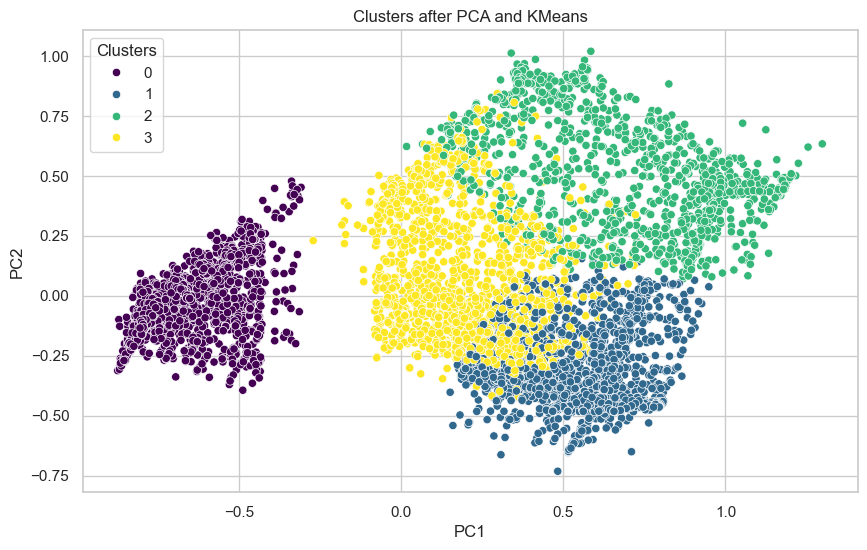

In [103]:
# 4. Use Pipeline
# 4. a. Use scaler and dimensional reduction (if it is necessary)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# 4. b. Create a pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])
# 4. c. Fit the pipeline
pipeline.fit(df.drop(columns=['Cluster']))
# 4. d. Predict the clusters
predicted_clusters = pipeline.predict(df.drop(columns=['Cluster']))
# 4. e. Add the predicted clusters to the original DataFrame
df['Predicted_Clusters'] = predicted_clusters
# 4. f. Visualize the clusters
# Get PCA-transformed features from the pipeline
pca_features = pipeline.named_steps['pca'].transform(
    pipeline.named_steps['scaler'].transform(df.drop(columns=['Cluster']))
)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Predicted_Clusters'], palette='viridis')
plt.title('Clusters after PCA and KMeans')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Clusters')
plt.show()

In [ ]:
# 4. b. Use suitable clustering model for this problem.

# Discussion & Conclusion